In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts import Trainer

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [2]:
import numpy as np
from gluonts.dataset.common import ListDataset

# 假设 data_matrix 是你的数据，形状为 (100, 200)
data_matrix = np.random.rand(100, 200)

# 将数据转换为 PyTorchTS 的数据格式
train_data = ListDataset(
    [{"start": 0, "target": data_matrix[i, :180], "feat_static_cat": [i]} for i in range(1)],
    freq = "1H"
)


In [4]:
from pts.model.deepar import DeepAREstimator
from pts import Trainer

training_data = ListDataset(
    [{"start":0, "target": data_matrix[1, :180]},{"start":0, "target": data_matrix[2, :180]}],
    freq = "5min"
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="5min",
                            prediction_length=12,
                            input_size=19,
                            trainer=Trainer(epochs=2,
                                            device=device))
predictor = estimator.train(training_data=training_data, num_workers=4)

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)


  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/li

  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:328: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/transform/feature.py:343: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base = start.freq.base
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:328: FutureWarning: The '

In [16]:
test_data = ListDataset(
    [{"start":0, "target": data_matrix[1, :]},{"start":0, "target": data_matrix[2, :]}],
    freq = "5min"
)

# for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
#     to_pandas(test_entry)[-60:].plot(linewidth=2)
#     forecast.plot(color='g', prediction_intervals=[50.0, 90.0])


In [17]:
# take one example of test_data- an iterator
test_entry = next(iter(test_data))
forecast_entry = predictor.predict(test_entry)
# test_series = to_pandas(forecast_entry)


In [19]:
from gluonts.evaluation import make_evaluation_predictions
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=10,  # number of sample paths we want for evaluation
)


In [20]:
forecasts = list(forecast_it)
tss = list(ts_it)

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/transform/feature.py:340: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  self._freq_base is None or self._freq_base == start.freq.base
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/transform/feature.py:384: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  ..., i0 : i0 + length * start.freq.n : start.freq.n
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/transform/split.py:36: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  return _shift_timestamp_helper(ts, ts.freq, offset)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages

In [21]:
forecasts 

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/core/serde/pd.py:31: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  "kwargs": {"freq": v.freqstr if v.freq else None},
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/core/serde/pd.py:31: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  "kwargs": {"freq": v.freqstr if v.freq else None},


[gluonts.model.forecast.SampleForecast(freq="5min", info=None, item_id=None, samples=numpy.array([[0.8395910263061523, 0.22721423208713531, 0.24005557596683502, 0.23657217621803284, 0.21252457797527313, 0.9493901133537292, 0.19611743092536926, 0.3701237440109253, 0.6283820271492004, 0.051743727177381516, 0.33229517936706543, 0.3819120228290558], [0.40075069665908813, 0.5609279274940491, 1.0685914754867554, 0.48010361194610596, 0.4986114799976349, 0.28872931003570557, 0.6470584273338318, 0.5304303765296936, -0.08223980665206909, -0.02195334993302822, 0.8973389267921448, 0.5210016369819641], [0.4872267544269562, 0.8426522016525269, 0.7648407220840454, 0.9742618203163147, 0.5690199732780457, 0.9753229022026062, 0.026673750951886177, 1.0553475618362427, 0.4941776990890503, 0.4294961988925934, 0.43313562870025635, 0.2589169442653656], [0.1838187277317047, 0.18838252127170563, 0.8658446669578552, 0.45293301343917847, 0.5488348007202148, 0.3053470551967621, 0.6892106533050537, 0.7942900657653

In [24]:
tss[0]

,0
1970-01-01 00:00:00,0.689038
1970-01-01 00:05:00,0.182307
1970-01-01 00:10:00,0.147946
1970-01-01 00:15:00,0.502591
1970-01-01 00:20:00,0.231617
...,...
1970-01-01 16:15:00,0.690479
1970-01-01 16:20:00,0.397742
1970-01-01 16:25:00,0.667467
1970-01-01 16:30:00,0.713707


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import torch

from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas

from pts.model.deepar import DeepAREstimator
from pts import Trainer

In [8]:
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df_2 = pd.read_csv(url, header=0, index_col=1, parse_dates=True)
df = pd.read_csv(url, header=0, index_col=0, parse_dates=True)

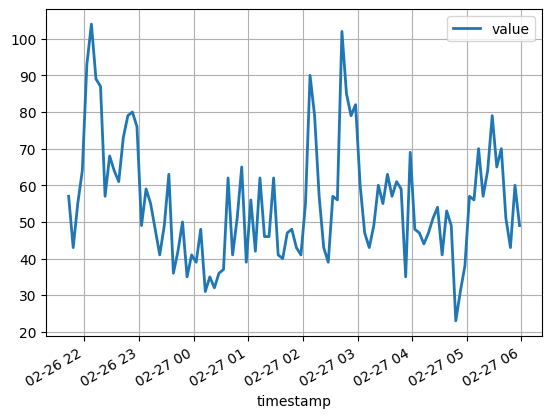

In [9]:
df[:100].plot(linewidth=2)
plt.grid(which='both')
plt.show()

In [ ]:
df.value[:"2015-04-05 00:00:00"]

In [10]:
training_data = ListDataset(
    [{"start":0, "target": data_matrix[1, :180]}],
    freq = "5min"
)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

estimator = DeepAREstimator(freq="5min",
                            prediction_length=12,
                            input_size=19,
                            trainer=Trainer(epochs=10,
                                            device=device))
predictor = estimator.train(training_data=training_data, num_workers=4)

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/li

  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:328: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  return pd.Timestamp(
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Times

  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is 

  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:324: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  timestamp = pd.Timestamp(timestamp_input, freq=freq)
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarn

  0%|          | 0/49 [00:00<?, ?it/s]

/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  timestamp.floor(timestamp.freq), timestamp.freq
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:327: FutureWarning: Timestamp.freq is deprecated and will be removed in a future version.
  if isinstance(timestamp.freq, Tick):
/home/venus/anaconda3/envs/ifar/lib/python3.10/site-packages/gluonts/dataset/common.py:329: FutureWarning: Timestamp.freq is 